<a href="https://colab.research.google.com/github/blaisely/classification_exercises/blob/main/classification_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',as_frame = False)

In [2]:
X, y = mnist.data, mnist.target
X_train, X_test, y_train,y_test = X[6000:], X[:6000], y[6000:], y[:6000]

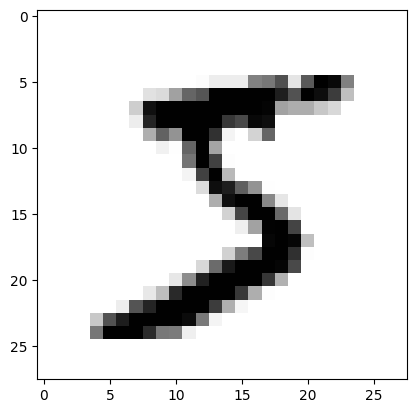

In [3]:
import matplotlib.pyplot as plt
import numpy as np
some_digit = X[0]
some_digit = np.reshape(some_digit,(28,28))
plt.imshow(some_digit, cmap="binary")
plt.show()

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_prediction = knn.predict(X_test[5:])
knn_prediction

array(['2', '1', '3', ..., '8', '6', '9'], dtype=object)

In [5]:
y_test[5:]

array(['2', '1', '3', ..., '8', '6', '9'], dtype=object)

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score,recall_score
accuracy_score(y_test[5:], knn_prediction)
confusion_matrix(y_test[5:], knn_prediction)
f1_score(y_test[5:], knn_prediction, average='micro')

0.9761467889908257

In [7]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(knn, X_train, y_train, cv=3, method="predict_proba")

In [ ]:
#dont run again
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_neighbors': [2,6,8],
     'weights': ['uniform','distance']},
    {'n_neighbors': [1,3,5],
     'weights': ['uniform,distance']},
]
grid_search = GridSearchCV(knn,param_grid,cv=3,scoring='accuracy')
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

In [11]:
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')
knn.fit(X_train, y_train)
knn_prediction = knn.predict(X_test)
knn_prediction[5:]

array(['2', '1', '3', ..., '8', '6', '9'], dtype=object)

In [12]:
accuracy_score(y_test, knn_prediction)

0.9751666666666666

In [13]:
recall_score(y_test, knn_prediction, average='micro')

0.9751666666666666

NameError: name 'knn' is not defined